In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
indices = pd.read_csv('indices_csv_data.csv')
indices['Unnamed: 0'] = pd.to_datetime(indices['Unnamed: 0'])  # Convert timestamp to datetime if necessary
indices.set_index('Unnamed: 0', inplace=True)
experiment = indices[['SPX Index', 'VIX Index']]
experiment.index = pd.to_datetime(experiment.index)
experiment.columns

Index(['SPX Index', 'VIX Index'], dtype='object')

In [5]:
experiment.describe()

,SPX Index,VIX Index
count,1868.000000,1868.000000
mean,4180.975562,21.034545
std,751.603361,8.163890
min,2237.400000,11.540000
25%,3714.240000,15.390000
50%,4167.205000,19.275000
75%,4550.467500,24.640000
max,6021.630000,82.690000


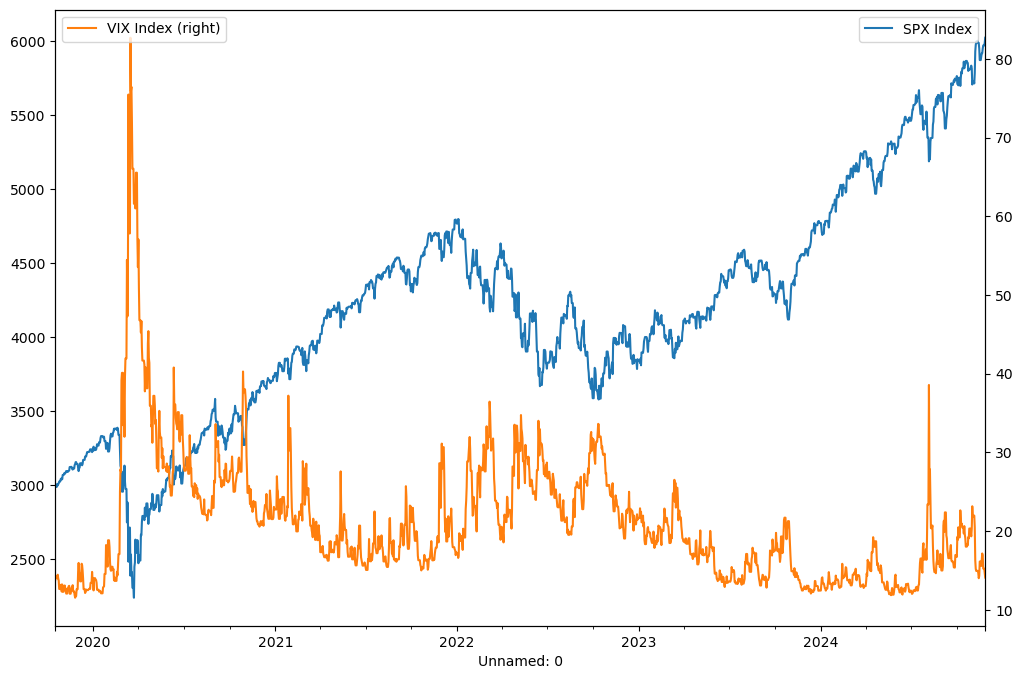

In [6]:
plt.figure(figsize = (12, 8 ))

ax_spx = experiment['SPX Index'].plot()
ax_vix = experiment['VIX Index'].plot(secondary_y=True)

ax_spx.legend(loc=1)
ax_vix.legend(loc=2)

plt.show()

array([[<Axes: title={'center': 'SPX Index'}>,
        <Axes: title={'center': 'VIX Index'}>]], dtype=object)

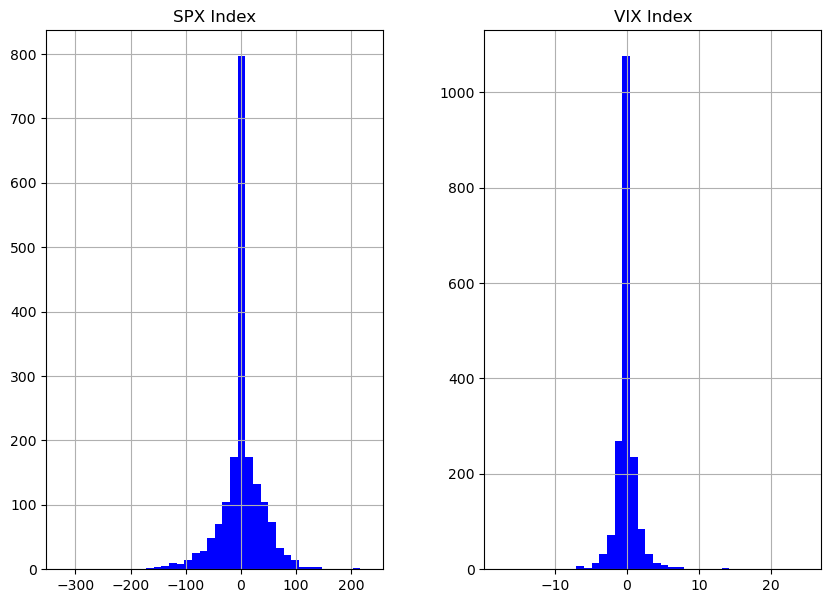

In [7]:
experiment.diff().hist(
    figsize=(10,7),
    color='blue',
    bins=40)

array([[<Axes: title={'center': 'SPX Index'}>,
        <Axes: title={'center': 'VIX Index'}>]], dtype=object)

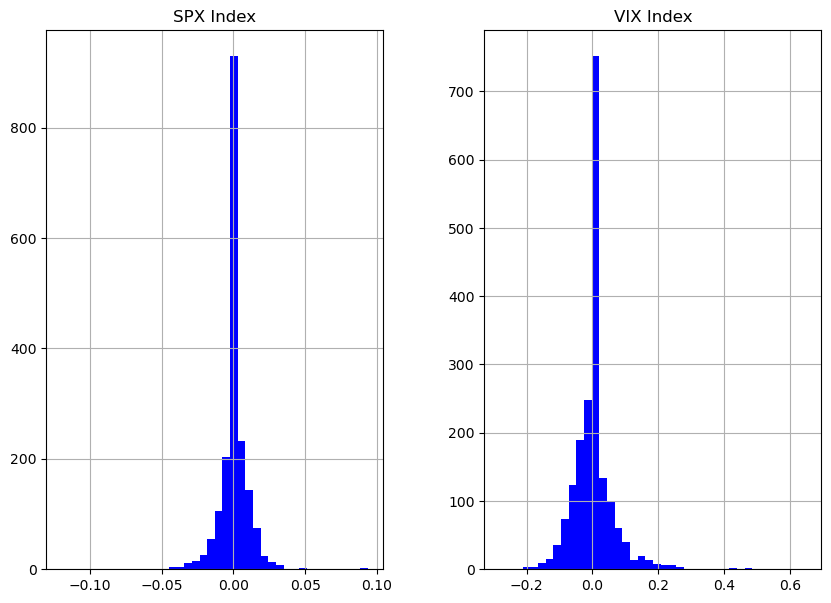

In [8]:
experiment.pct_change().hist(
    figsize=(10,7),
    color='blue',
    bins=40)

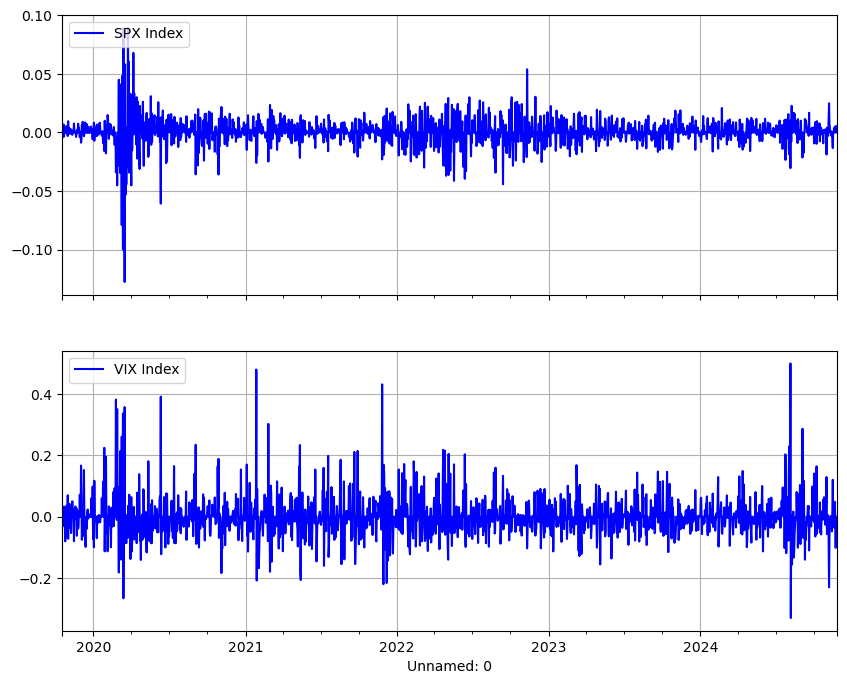

In [11]:
log_returns = np.log(experiment / experiment.shift(1)).dropna()
log_returns.plot(
    subplots=True,
    figsize=(10, 8),
    color='blue',
    grid=True
    );
for ax in plt.gcf().axes:
    ax.legend(loc='upper left')

In [12]:
log_returns.corr()

,SPX Index,VIX Index
SPX Index,1.000000,-0.703415
VIX Index,-0.703415,1.000000


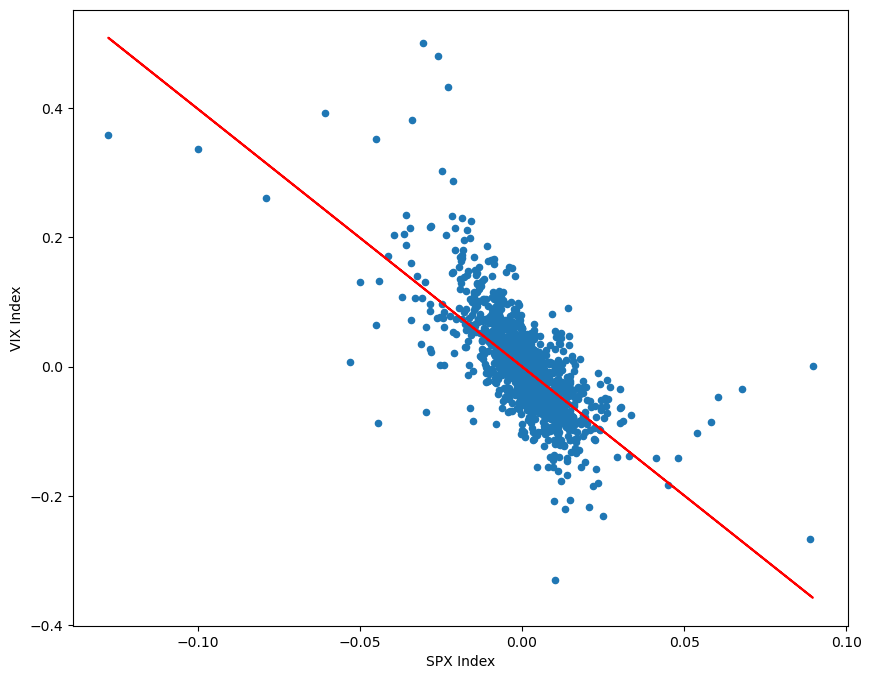

In [15]:
log_returns.plot(
    figsize=(10,8),
    x="SPX Index",
    y="VIX Index",
    kind='scatter')

ols_fit = sm.OLS(log_returns['VIX Index'].values,
    log_returns['SPX Index'].values).fit()

plt.plot(log_returns['SPX Index'], ols_fit.fittedvalues, 'r')

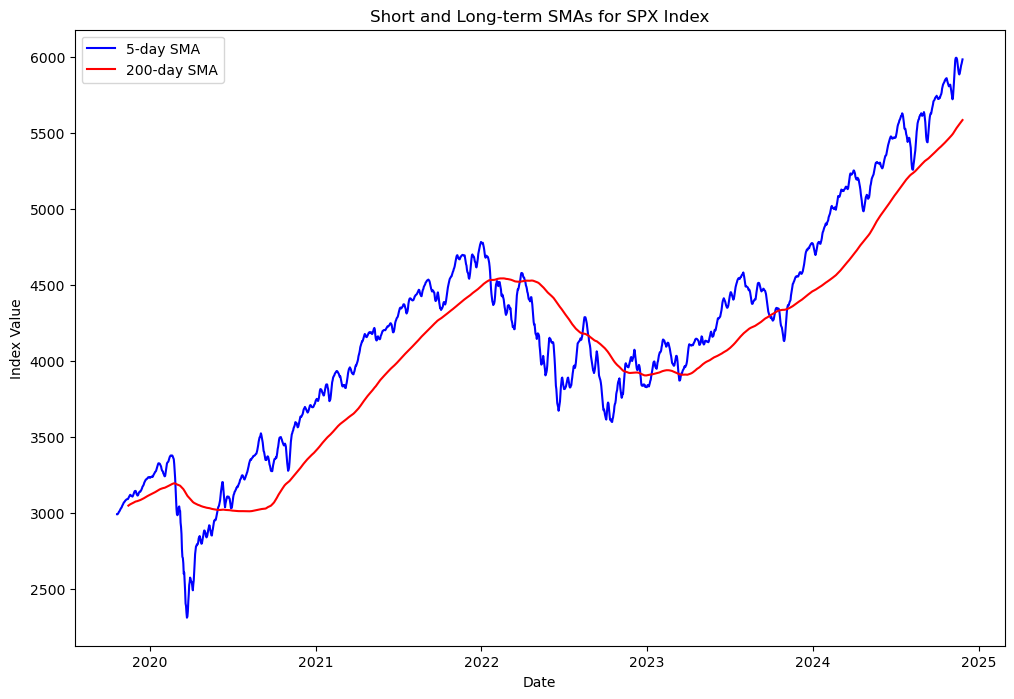

In [16]:
df_sma = pd.DataFrame(index=experiment.index)
df_sma['short'] = experiment['SPX Index'].rolling(window=5, min_periods=5).mean()
df_sma['long'] = experiment['SPX Index'].rolling(window=200, min_periods=30).mean()

# Plot the SMAs
plt.figure(figsize=(12, 8))
plt.plot(df_sma.index, df_sma['short'], label='5-day SMA', color='blue')
plt.plot(df_sma.index, df_sma['long'], label='200-day SMA', color='red')
plt.title("Short and Long-term SMAs for SPX Index")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.show()

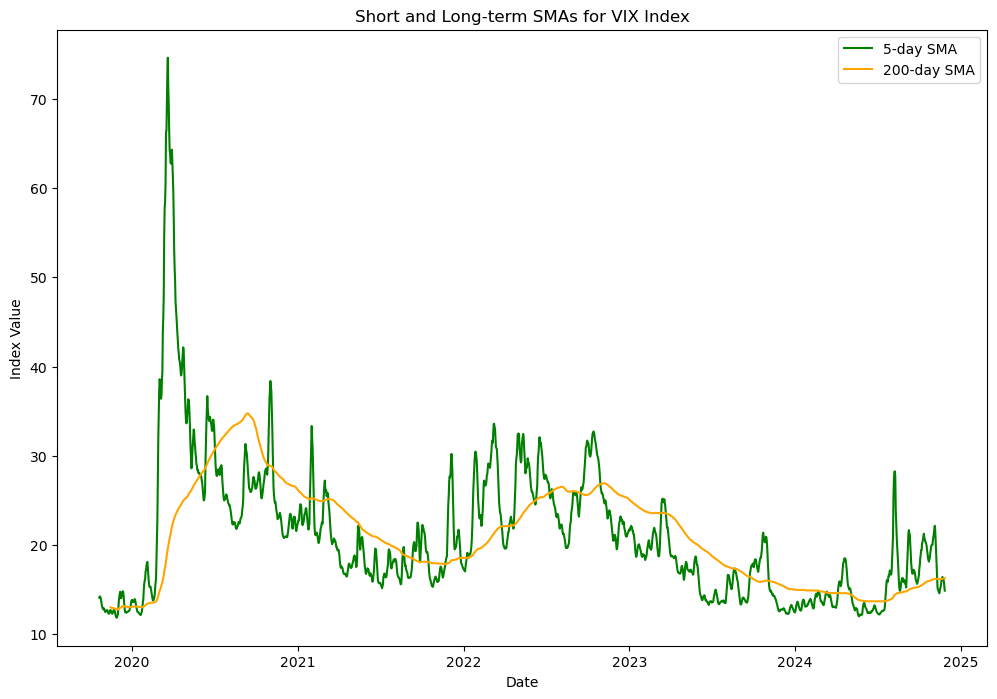

In [17]:
df_sma = pd.DataFrame(index=experiment.index)

df_sma['short'] = experiment['VIX Index'].rolling(window=5, min_periods=5).mean()
df_sma['long'] = experiment['VIX Index'].rolling(window=200, min_periods=30).mean()

plt.figure(figsize=(12, 8))
plt.plot(df_sma.index, df_sma['short'], label='5-day SMA', color='green')
plt.plot(df_sma.index, df_sma['long'], label='200-day SMA', color='orange')
plt.title("Short and Long-term SMAs for VIX Index")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.show()

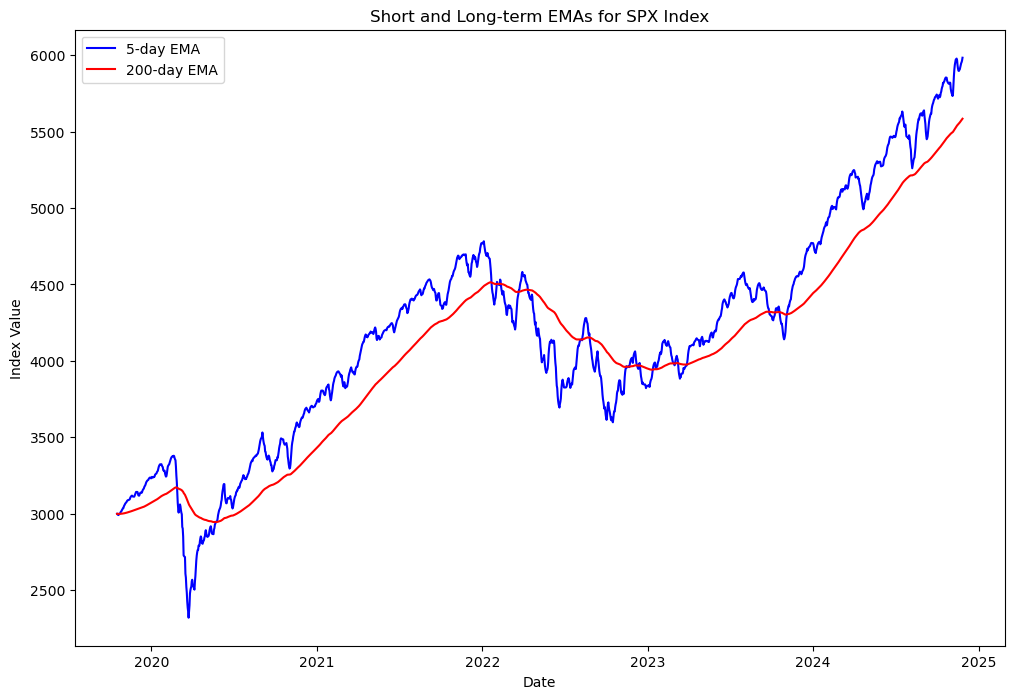

In [18]:
df_sma['short'] = experiment['SPX Index'].ewm(span=5, adjust=False).mean()
df_sma['long'] = experiment['SPX Index'].ewm(span=200, adjust=False).mean()

# Plot the EMAs
plt.figure(figsize=(12, 8))
plt.plot(df_sma.index, df_sma['short'], label='5-day EMA', color='blue')
plt.plot(df_sma.index, df_sma['long'], label='200-day EMA', color='red')
plt.title("Short and Long-term EMAs for SPX Index")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.show()

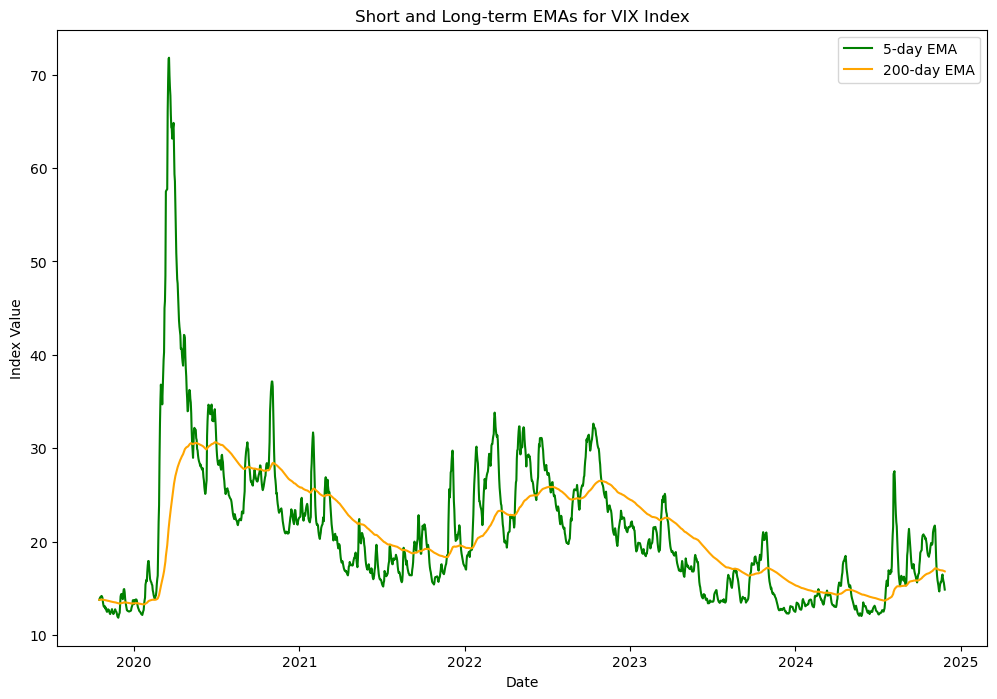

In [19]:
df_sma['short'] = experiment['VIX Index'].ewm(span=5, adjust=False).mean()
df_sma['long'] = experiment['VIX Index'].ewm(span=200, adjust=False).mean()

plt.figure(figsize=(12, 8))
plt.plot(df_sma.index, df_sma['short'], label='5-day EMA', color='green')
plt.plot(df_sma.index, df_sma['long'], label='200-day EMA', color='orange')
plt.title("Short and Long-term EMAs for VIX Index")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.show()

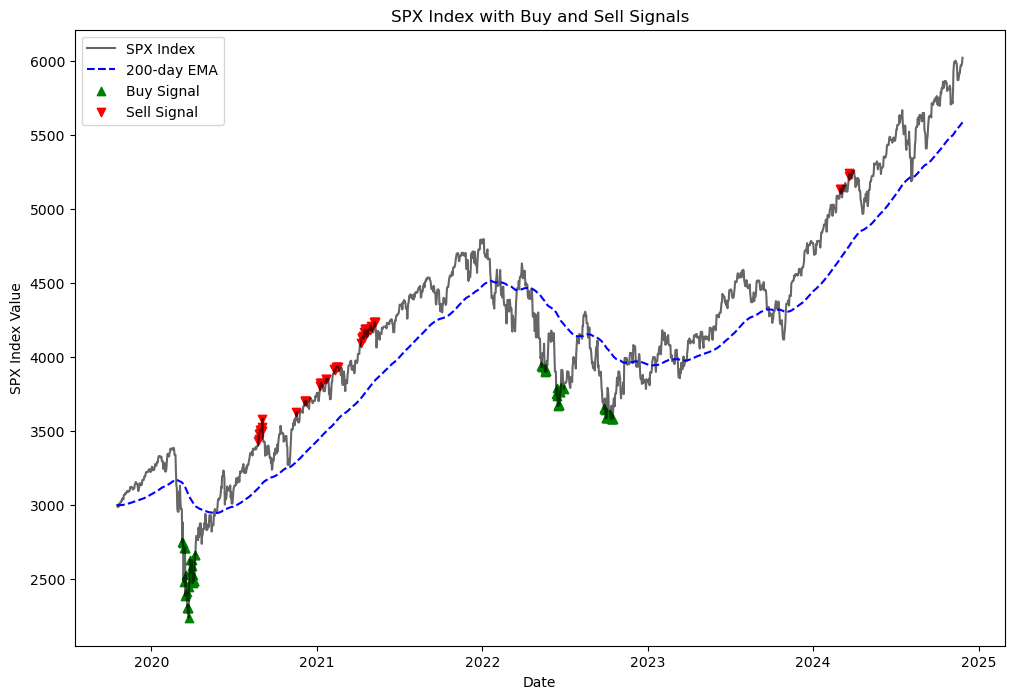

In [20]:
df_sma = pd.DataFrame(index=experiment.index)
df_sma['200-day EMA'] = experiment['SPX Index'].ewm(span=200, adjust=False).mean()

# Calculate the percentage deviation from the 200-day EMA
df_sma['deviation'] = (experiment['SPX Index'] - df_sma['200-day EMA']) / df_sma['200-day EMA'] * 100

# Set thresholds for buy and sell signals (e.g., 5% deviation)
buy_threshold = -10   # Buy when SPX is 5% below the 200-day EMA
sell_threshold = 10   # Sell when SPX is 5% above the 200-day EMA

# Buy signal: When SPX is 5% below the EMA
df_sma['buy_signal'] = df_sma['deviation'] <= buy_threshold

# Sell signal: When SPX is 5% above the EMA
df_sma['sell_signal'] = df_sma['deviation'] >= sell_threshold

# Plot the SPX Index, EMA, and Buy/Sell signals
plt.figure(figsize=(12, 8))
plt.plot(experiment.index, experiment['SPX Index'], label='SPX Index', color='black', alpha=0.6)
plt.plot(df_sma.index, df_sma['200-day EMA'], label='200-day EMA', color='blue', linestyle='--')

# Plot Buy signals
plt.scatter(df_sma.index[df_sma['buy_signal']], experiment['SPX Index'][df_sma['buy_signal']], label='Buy Signal', marker='^', color='green', alpha=1)

# Plot Sell signals
plt.scatter(df_sma.index[df_sma['sell_signal']], experiment['SPX Index'][df_sma['sell_signal']], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title("SPX Index with Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("SPX Index Value")
plt.legend()
plt.show()

In [21]:
num_buy_signals = df_sma['buy_signal'].sum()
num_sell_signals = df_sma['sell_signal'].sum()

# Output the counts
print(f"Number of Buy Signals: {num_buy_signals}")
print(f"Number of Sell Signals: {num_sell_signals}")

Number of Buy Signals: 60
Number of Sell Signals: 55


In [22]:
# Filter the DataFrame for Buy and Sell signals
buy_signals_table = df_sma[df_sma['buy_signal'] == True][['200-day EMA', 'deviation']]
sell_signals_table = df_sma[df_sma['sell_signal'] == True][['200-day EMA', 'deviation']]

# Output the tables of buy and sell signal observations
print("\nBuy Signals Observations:")
print(buy_signals_table)


Buy Signals Observations:
            200-day EMA  deviation
Unnamed: 0                        
2020-03-09  3148.153694 -12.756483
2020-03-11  3141.486516 -12.736216
2020-03-12  3134.910929 -20.870479
2020-03-13  3130.693108 -13.405118
2020-03-14  3126.517257 -13.289460
2020-03-15  3122.382955 -13.174648
2020-03-16  3115.057055 -23.400119
2020-03-17  3109.227532 -18.655358
2020-03-18  3102.151637 -22.695591
2020-03-19  3095.258486 -22.158682
2020-03-20  3087.394421 -25.344168
2020-03-21  3079.608606 -25.155424
2020-03-22  3071.900262 -24.967616
2020-03-23  3063.596777 -26.968196
2020-03-24  3057.464769 -19.955578
2020-03-25  3051.674672 -18.878640
2020-03-26  3047.479600 -13.696879
2020-03-27  3042.444679 -16.466189
2020-03-28  3037.459856 -16.329100
2020-03-29  3032.524634 -16.192931
2020-03-30  3028.486080 -13.268546
2020-03-31  3024.069204 -14.532710
2020-04-01  3018.561053 -18.156368
2020-04-02  3013.668903 -16.152037
2020-04-03  3008.444834 -17.277858
2020-04-04  3003.272746 -17.

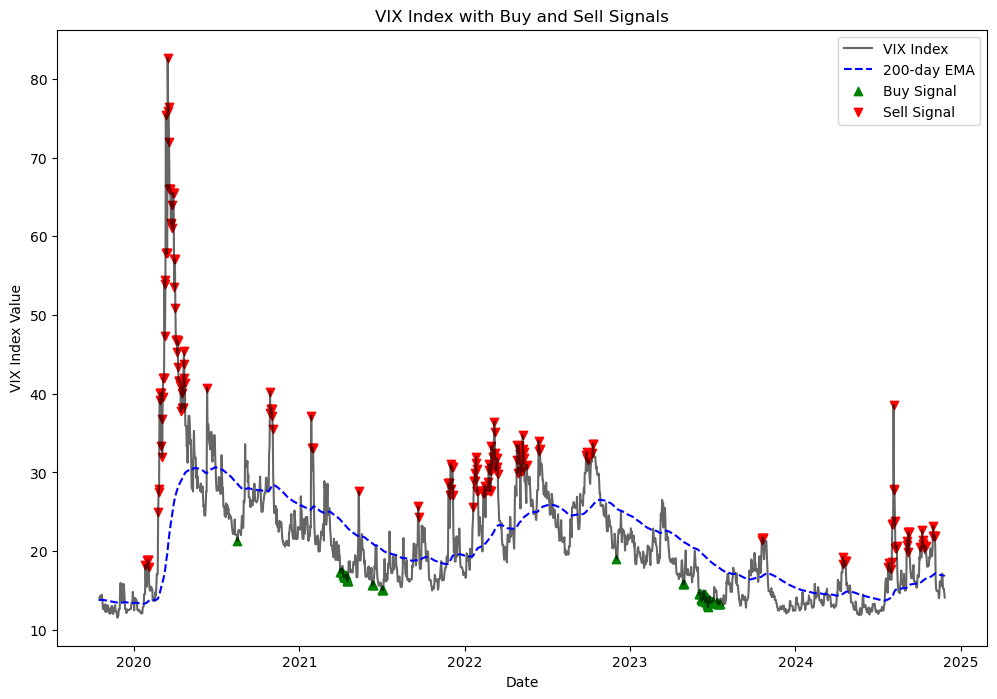

In [23]:
df_sma = pd.DataFrame(index=experiment.index)
df_sma['200-day EMA'] = experiment['VIX Index'].ewm(span=200, adjust=False).mean()

# Calculate the percentage deviation from the 200-day EMA
df_sma['deviation'] = (experiment['VIX Index'] - df_sma['200-day EMA']) / df_sma['200-day EMA'] * 100

# Set thresholds for buy and sell signals (e.g., 5% deviation)
buy_threshold = -25   # Buy when SPX is 5% below the 200-day EMA
sell_threshold = 25   # Sell when SPX is 5% above the 200-day EMA

# Buy signal: When SPX is 5% below the EMA
df_sma['buy_signal'] = df_sma['deviation'] <= buy_threshold

# Sell signal: When SPX is 5% above the EMA
df_sma['sell_signal'] = df_sma['deviation'] >= sell_threshold

# Plot the SPX Index, EMA, and Buy/Sell signals
plt.figure(figsize=(12, 8))
plt.plot(experiment.index, experiment['VIX Index'], label='VIX Index', color='black', alpha=0.6)
plt.plot(df_sma.index, df_sma['200-day EMA'], label='200-day EMA', color='blue', linestyle='--')

# Plot Buy signals
plt.scatter(df_sma.index[df_sma['buy_signal']], experiment['VIX Index'][df_sma['buy_signal']], label='Buy Signal', marker='^', color='green', alpha=1)

# Plot Sell signals
plt.scatter(df_sma.index[df_sma['sell_signal']], experiment['VIX Index'][df_sma['sell_signal']], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title("VIX Index with Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("VIX Index Value")
plt.legend()
plt.show()

In [24]:
num_buy_signals = df_sma['buy_signal'].sum()
num_sell_signals = df_sma['sell_signal'].sum()

# Output the counts
print(f"Number of Buy Signals: {num_buy_signals}")
print(f"Number of Sell Signals: {num_sell_signals}")

Number of Buy Signals: 63
Number of Sell Signals: 200


In [25]:
buy_signals_table = df_sma[df_sma['buy_signal'] == True][['200-day EMA', 'deviation']]
sell_signals_table = df_sma[df_sma['sell_signal'] == True][['200-day EMA', 'deviation']]


print("\nSell Signals Observations:")
print(sell_signals_table)


Sell Signals Observations:
            200-day EMA  deviation
Unnamed: 0                        
2020-01-27    13.384762  36.199656
2020-01-31    13.517050  39.379524
2020-02-01    13.570015  38.835517
2020-02-02    13.622452  38.301089
2020-02-03    13.665712  31.496995
...                 ...        ...
2024-10-31    16.943927  36.686141
2024-11-01    16.993042  28.758581
2024-11-02    17.041669  28.391183
2024-11-03    17.089811  28.029501
2024-11-04    17.138470  28.249489

[200 rows x 2 columns]
